# Desafío Número 2: Equipo 7

## Introducción

Después de la limpieza del dataset de properati, levantamos la base limpia y generamos mas variables que no habiamos tenido presentes.
Una vez limpio el data frame con las variables necesarias analizamos el modelo de regresion lineal a utilizar.

<a id="section_dataset"></a> 

## Dataset

[volver a Indice](#section_indice)

In [33]:
# Importamos las librerías

%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import re

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.api as sm

In [39]:
#Levantamos el archivo de trabajo
data_location = "..DHDS-7-master/Notebooks/DESAFIO 2/properati_limpio.csv"
data = pd.read_csv(data_location)

#Vusalizamos las primeras observaciones del data set
pd.set_option('display.max_columns', None)
data.head(3)


FileNotFoundError: [Errno 2] File ..DHDS-7-master/Notebooks/DESAFIO 2/properati_limpio.csv does not exist: '..DHDS-7-master/Notebooks/DESAFIO 2/properati_limpio.csv'

In [32]:
data.shape

NameError: name 'data' is not defined

## Terminamos de limpiar los datos

### Metros cuadrados

In [ ]:
data_m2_vs_description = data.loc[:,["surface_total_in_m2_nuevo","description"]]

In [ ]:
mask = data_m2_vs_description["surface_total_in_m2_nuevo"].isnull()
data_m2_vs_description_nulos = data_m2_vs_description[mask]
data_m2_vs_description_nulos

In [ ]:
description_serie = data_m2_vs_description_nulos["description"]

In [ ]:
patron2 = "\d+( ?)m2(c?)|\d+( ?)m²|\d+( ?)mts|\d+( ?)MT|\d+( ?) metros|\d+( ?)mt2|\d+( ?)M2(C?)"
regex2 = re.compile(patron2)
resultado = description_serie.apply(lambda x:  x if x is np.NaN else regex2.search(x))

In [ ]:
numeros_match = resultado[resultado.notnull()].apply(lambda x: x.group(0))

In [ ]:
sub_patron = "\d+"
sub_regex = re.compile(sub_patron)
resultado2 = numeros_match.apply(lambda x:  x if x is np.NaN else sub_regex.search(x))

In [ ]:
numeros_match2 = resultado2[resultado2.notnull()].apply(lambda x: x.group(0))

In [ ]:
surface_total_m2_actualizado = data["surface_total_in_m2_nuevo"].fillna(numeros_match2)
surface_total_m2_actualizado.head()

In [ ]:
surface_total_m2_actualizado.isnull().sum()

In [ ]:
surface_total_m2_actualizado_con_sup_covered = surface_total_m2_actualizado.fillna(data.loc[:,"surface_covered_in_m2_nuevo"])
surface_total_m2_actualizado_con_sup_covered.isnull().sum()

In [ ]:
surface_total_m2_actualizado_con_sup_covered.shape

In [ ]:
data['surface_total_in_m2_nuevo'] = surface_total_m2_actualizado_con_sup_covered

### Baños

In [ ]:
#Creación de una nueva columna 'baños' vacía, la cual va a contener la cantidad de baños en una propiedad
data['baños'] = np.nan

In [ ]:
#Comprobación de valores null en 'baños'
data['baños'].isnull().value_counts()

In [ ]:
#Cambio a minúscula estas dos nuevas columnas creadas
data['description_copia'] = data['description'].astype(str).str.lower()
data['title_copia']= data['title'].astype(str).str.lower()

In [ ]:
#Comprobación de valores null en data 'description_copia'
data['description_copia'].isnull().value_counts()

In [ ]:
#Comprobación de valores null en data 'title_copia'
data['title_copia'].isnull().value_counts()

#### Búsqueda de baños con expresiones regulares: 

In [ ]:
#defino la función cuenta_valores para ver cuántos valores nulos y no nulos hay en una columna.
def cuenta_valores(columna): 
    valores = data[columna].isnull().value_counts()
    
    return valores

In [ ]:
#Defino la columna tabla_pivot_baños para obtener una tabla pivot con los datos que se van asignando a la columna baños, según el tipo de propiedad.
def tabla_pivot_baños():
    bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 30, 40, 50, 1000, 2000]
    baños = pd.cut(data.baños, bins, right = False)
    tabla = data.pivot_table('baños', index = [baños], columns= 'property_type', aggfunc={'baños': 'count'})
    
    return tabla

In [ ]:
patron = "\s(?P<numero>\d[\d]?)\s+baño[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [ ]:
patron =  "\s(?P<numero>\d[\d]?)\s+baã±o[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [ ]:
patron =  "\s(?P<numero>\d[\d]?)\s+bano[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [ ]:
patron =  "\sbaño[s]?\s*:\s*(?P<numero>\d[\d]?)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [ ]:
patron =  "\sbaã±o[s]?\s*:\s*(?P<numero>\d[\d]?)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [ ]:
patron =  "\sbano[s]?\s*:\s*(?P<numero>\d[\d]?)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [ ]:
patron = r"\s(un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|diecisiete|dieciocho|diecinueve|veinte)[\s]*baño[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'un': 1,'dos':2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, \
                    'siete':7, 'ocho': 8, 'nueve': 9, 'diez': 10, \
                    'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quice': 15, 'dieciseis': 16, \
                    'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19,\
                    'veinte': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [ ]:
data.loc[mask_description_notnull,'baños']= encontradas1.astype(float)

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [ ]:
patron = r"\s(un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|diecisiete|dieciocho|diecinueve|veinte)[\s]*baã±o[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'un': 1,'dos':2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, \
                    'siete':7, 'ocho': 8, 'nueve': 9, 'diez': 10, \
                    'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quice': 15, 'dieciseis': 16, \
                    'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19,\
                    'veinte': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [ ]:
data.loc[mask_description_notnull,'baños']= encontradas1.astype(float)

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [ ]:
patron = r"\s(un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|diecisiete|dieciocho|diecinueve|veinte)[\s]*bano[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'un': 1,'dos':2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, \
                    'siete':7, 'ocho': 8, 'nueve': 9, 'diez': 10, \
                    'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quice': 15, 'dieciseis': 16, \
                    'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19,\
                    'veinte': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [ ]:
data.loc[mask_description_notnull,'baños']= encontradas1.astype(float)

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [ ]:
patron = "baño"
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

In [ ]:
patron = "baã±o"
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

In [ ]:
patron = " bano "
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

In [ ]:
patron = "sanitario"
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

In [ ]:
patron = "toilette"
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

In [ ]:
patron = "inodoro"
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

#### Ahora busco con las mismas regex pero con la columna 'title_copia'

In [ ]:
patron = "\s(?P<numero>\d[\d]?)\s+baño[s]?"
busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [ ]:
patron = "baño"
description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [ ]:
cuenta_valores('baños')

In [ ]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

#### Imputación de NULLS

In [ ]:
mask1 = (data['baños'].isnull()) & (data['property_type'] == 'PH')

In [ ]:
data.loc[mask1, 'baños'] = 1

In [ ]:
mask2 = (data['baños'].isnull()) & (data['property_type'] == 'apartment')

In [ ]:
data.loc[mask2, 'baños'] = 1

In [ ]:
mask3 = (data['baños'].isnull()) & (data['property_type'] == 'house')

In [ ]:
data.loc[mask3, 'baños'] = 1

In [ ]:
mask4 = (data['baños'].isnull()) & (data['property_type'] == 'store')

In [ ]:
data.loc[mask4, 'baños'] = 1

In [ ]:
tabla_pivot_baños()

## Seleccion de columnas necesarias

In [ ]:
#Nos quedamos solo con las columnas necesarias

data = data.drop(['place_name', 'description', 'title', 'expenses_bool', 'expenses_nuevo', 'geonames_id_nuevo'\
                  , 'lat-lon_nuevo', 'lat_nuevo', 'lon_nuevo', 'description_copia', 'title_copia', 'currency_nuevo',\
                 'price_aprox_local_currency_nuevo', 'price_aprox_usd_nuevo', 'price_usd_per_m2_nuevo',\
                 'zona', 'barrio', 'lugar', 'es_outlier'], axis = 1)

In [ ]:
data.head(3)

In [ ]:
data.dtypes

In [ ]:
#En floor completamos con 0
data['floor_copia'].fillna(0, inplace = True)

In [ ]:
data.isnull().sum()

## Generamos nuevas variables

### Precio por metro cuadrado

In [ ]:
#Generamos la variable precio por metro cuadrado dividiendo el precio en dolares por los m2 totales

#Cambiamos superficie total en m2 a float
data['surface_total_in_m2_nuevo'] = pd.to_numeric(data['surface_total_in_m2_nuevo'],errors='coerce')
mask_price_per_m2_nuevo = data['surface_covered_in_m2_nuevo'].notnull()
data['price_per_m2'] = data.loc[mask_price_per_m2_nuevo, 'price_nuevo']/data.loc[mask_price_per_m2_nuevo, 'surface_covered_in_m2_nuevo']
data.head(3)

In [ ]:
mask_price_per_m2_nuevo2 = data['price_per_m2_nuevo'].isnull()
data.loc[mask_price_per_m2_nuevo2, 'price_per_m2_nuevo'] = data.loc[mask_price_per_m2_nuevo2, 'price_per_m2']
data.head(3)

In [ ]:
data.isnull().sum()

In [ ]:
data = data.dropna()
data.head(3)

In [ ]:
data = data.drop(['price_per_m2', 'price_nuevo'], axis = 1)

In [ ]:
data.head()

In [ ]:
data.dtypes

In [ ]:
#Limpiamos los outliers

columnas_para_limpiar_outliers = ['floor_copia', 'surface_total_in_m2_nuevo', 'surface_covered_in_m2_nuevo', 'price_per_m2_nuevo']

for i in columnas_para_limpiar_outliers:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)


    iqr = (q3 - q1) * 1.5

    limite_superior = q3 + iqr
    limite_inferior = q1 - iqr

    outlier_mask_sup = data[i] > limite_superior
    outlier_mask_inf = data[i] < limite_inferior
    outlier_mask = np.logical_or(outlier_mask_sup, outlier_mask_inf)
    not_outliers = np.logical_not(outlier_mask)
    data = data[not_outliers]

## Limpiamos los casos excepcionales de Baños

In [ ]:
data.baños.value_counts()

In [ ]:
mask_muchos_baños = data.baños <= 10
data = data[mask_muchos_baños]

In [ ]:
data.baños.value_counts()

In [ ]:
data.describe()

In [ ]:
data.shape

## Analizamos si existe correlación entre variables

In [ ]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu", annot = True);

In [ ]:
# Exportamos el csv
# data.to_csv(r'C:\Users\gbulgach\Desktop\Curso Data Science\Desafio 2\properati_limpio_sin_dummies.csv', index = False)

In [352]:
data_location = "../DESAFIO 2/properati_limpio_sin_dummies.csv"
data = pd.read_csv(data_location)
data.head(3)

property_type                    state_name  rooms_completo  PILETA  \
0            PH               Capital Federal             0.0   False   
1     apartment               Capital Federal             0.0   False   
2     apartment  Buenos Aires Costa Atlántica             1.0   False   

   PARRILLA  PATIO_JARDIN  floor_copia    ant  surface_total_in_m2_nuevo  \
0     False         False          0.0  otros                       55.0   
1     False         False          3.0  otros                       55.0   
2     False         False          0.0  otros                       35.0   

   surface_covered_in_m2_nuevo  price_per_m2_nuevo       pais  \
0                         40.0        19890.163636  Argentina   
1                         55.0        23098.254545  Argentina   
2                         35.0        32264.228571  Argentina   

                      provincia      localidad  baños  
0               Capital Federal      Mataderos    1.0  
1               Capital Federal      Mataderos    1.0  
2  Buenos Aires Costa Atlántica  Mar del Plata    1.0

## Generamos las variables dummies necesarias

In [91]:
#Generamos variables dummies

# data = pd.get_dummies(data = data, columns = ['property_type', 'state_name', 'ant', 'pais', 'provincia', 'localidad'], drop_first = True)
data_dummies = pd.get_dummies(data = data, columns = ['state_name', 'ant', 'pais', 'provincia', 'localidad', 'baños'], drop_first = True)

In [92]:
pd.set_option('display.max_columns', None)
data_dummies.head()

property_type  rooms_completo  PILETA  PARRILLA  PATIO_JARDIN  floor_copia  \
0            PH             0.0   False     False         False          0.0   
1     apartment             0.0   False     False         False          3.0   
2     apartment             1.0   False     False         False          0.0   
3            PH             1.0   False     False          True          0.0   
4     apartment             0.0    True     False         False          0.0   

   surface_total_in_m2_nuevo  surface_covered_in_m2_nuevo  price_per_m2_nuevo  \
0                       55.0                         40.0        19890.163636   
1                       55.0                         55.0        23098.254545   
2                       35.0                         35.0        32264.228571   
3                      106.0                         78.0        21639.481132   
4                       45.0                         40.0        54109.800000   

   state_name_Bs.As. G.B.A. Zona Oeste  state_name_Bs.As. G.B.A. Zona Sur  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   

   state_name_Buenos Aires Costa Atlántica  state_name_Buenos Aires Interior  \
0                                        0                                 0   
1                                        0                                 0   
2                                        1                                 0   
3                                        0                                 0   
4                                        0                                 0   

   state_name_Capital Federal  state_name_Catamarca  state_name_Chaco  \
0                           1                     0                 0   
1                           1                     0                 0   
2                           0                     0                 0   
3                           0                     0                 0   
4                           1                     0                 0   

   state_name_Chubut  state_name_Corrientes  state_name_Córdoba  \
0                  0                      0                   0   
1                  0                      0                   0   
2                  0                      0                   0   
3                  0                      0                   0   
4                  0                      0                   0   

   state_name_Entre Ríos  state_name_Jujuy  state_name_La Pampa  \
0                      0                 0                    0   
1                      0                 0                    0   
2                      0                 0                    0   
3                      0                 0                    0   
4                      0                 0                    0   

   state_name_La Rioja  state_name_Mendoza  state_name_Misiones  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

   state_name_Neuquén  state_name_Río Negro  state_name_Salta  \
0                   0                     0                 0   
1                   0                     0                 0   
2                   0                     0                 0   
3                   0                     0                 0   
4                   0                     0                 0   

   state_name_San Juan  state_name_San Luis  state_

In [93]:
# Exportamos el archivo con los dummies
# data.to_csv(r'C:\Users\gbulgach\Desktop\Curso Data Science\Desafio 2\properati_limpio_con_dummies.csv', index = False)

# Generamos el modelo de regresion lineal multiple

#### Preparamos la matriz de features y el array target con la información del precio por m2 que queremos predecir

In [95]:
# data_dummies['state_name'] = data['state_name']

In [351]:
# X = data_dummies.drop(['price_per_m2_nuevo'], axis = 1)
X = data_dummies[['surface_total_in_m2_nuevo', 'rooms_completo', 'PILETA', 'PARRILLA', 'PATIO_JARDIN', \
          'floor_copia','property_type','state_name_Bs.As. G.B.A. Zona Oeste', 'state_name_Bs.As. G.B.A. Zona Sur', 'state_name_Buenos Aires Costa Atlántica', \
          'state_name_Buenos Aires Interior', 'state_name_Capital Federal', 'state_name_Catamarca', 'state_name_Chaco', \
          'state_name_Chubut', 'state_name_Corrientes', 'state_name_Córdoba', 'state_name_Entre Ríos', 'state_name_Jujuy', \
          'state_name_La Pampa', 'state_name_La Rioja', 'state_name_Mendoza', 'state_name_Misiones', 'state_name_Neuquén', \
          'state_name_Río Negro', 'state_name_Salta', 'state_name_San Juan', 'state_name_San Luis', 'state_name_Santa Cruz', \
          'state_name_Santa Fe', 'state_name_Santiago Del Estero', 'state_name_Tierra Del Fuego', 'state_name_Tucumán', 'ant_otros',\
          'baños_2.0', 'baños_3.0', 'baños_4.0', 'baños_5.0', 'baños_6.0', 'baños_7.0', 'baños_8.0', 'baños_9.0', 'baños_10.0', 'baños_12.0',\
          'baños_13.0', 'baños_15.0', 'baños_20.0', 'baños_21.0', 'baños_30.0','baños_31.0', 'baños_41.0', 'baños_42.0', 'baños_61.0', 'baños_71.0']]

# X = data_dummies[['surface_total_in_m2_nuevo', 'rooms_completo', 'PILETA', 'PARRILLA', 'PATIO_JARDIN', \
#           'floor_copia', 'property_type_apartment', 'property_type_house', 'property_type_store', \
#           'baños', 'state_name_Bs.As. G.B.A. Zona Oeste', 'state_name_Bs.As. G.B.A. Zona Sur', 'state_name_Buenos Aires Costa Atlántica', \
#           'state_name_Buenos Aires Interior', 'state_name_Capital Federal']]

# X = data_dummies[['surface_total_in_m2_nuevo', 'rooms_completo', 'baños', 'PILETA', 'PARRILLA', 'PATIO_JARDIN', \
#           'floor_copia', 'property_type_apartment', 'property_type_house', 'property_type_store', \
#           'state_name_Bs.As. G.B.A. Zona Oeste', 'state_name_Bs.As. G.B.A. Zona Sur', 'state_name_Buenos Aires Costa Atlántica', \
#           'state_name_Buenos Aires Interior', 'state_name_Capital Federal', 'state_name_Catamarca', 'state_name_Chaco', \
#           'state_name_Chubut', 'state_name_Corrientes', 'state_name_Córdoba', 'state_name_Entre Ríos', 'state_name_Jujuy', \
#           'state_name_La Pampa', 'state_name_La Rioja', 'state_name_Mendoza', 'state_name_Misiones', 'state_name_Neuquén', \
#           'state_name_Río Negro', 'state_name_Salta', 'state_name_San Juan', 'state_name_San Luis', 'state_name_Santa Cruz', \
#           'state_name_Santa Fe', 'state_name_Santiago Del Estero', 'state_name_Tierra Del Fuego', 'state_name_Tucumán', 'ant_otros', \
#          'baños']]


y = data_dummies['price_per_m2_nuevo']

In [249]:
print(X.shape)
print(y.shape)

(72232, 2)
(72232,)


### Hacemos el split entre train y test

In [250]:
#Hacemos el split entre train y test, tomando el 25% de los datos de manera 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 1)

In [251]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54174, 2)
(18058, 2)
(54174,)
(18058,)


### Instanciamos y entrenamos el modelo con X_train e y_train

In [108]:
linreg = LinearRegression(normalize = True)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Imprimimos los coeficientes y corremos la prediccion sobre X_test

In [109]:
print (linreg.intercept_)
print (linreg.coef_)

29555.379553615745
[-1.54396257e-02 -9.47894721e+02  1.53380777e+03 -2.38095353e+03
 -5.59610466e+03 -4.90954627e+01 -7.64330473e+03 -6.89204076e+03
 -3.86041421e+03 -1.26897176e+04  1.70083818e+04 -2.02237224e+04
 -4.55925921e+03 -3.33609626e+03 -6.11483892e+03 -1.30201005e+04
 -1.41871613e+04 -1.67414865e+04 -1.97243742e+04  3.53473427e+18
 -4.39711862e+01 -8.06145246e+03 -4.18322041e+03 -6.54191784e+03
 -1.16155824e+04  2.43634927e+03 -5.22240811e+03 -7.14986464e+03
 -4.75635536e+03 -1.77377701e+04  3.35692319e+03  1.47671609e+04
 -1.82290709e+03 -3.88544619e+03 -3.87517249e+03 -2.38963070e+03
 -4.24556974e+03 -7.99419816e+02 -1.39573851e+04 -1.75742049e+04
 -3.89185332e+03 -1.51336114e+04 -2.28097059e+04  1.09002461e+04
 -1.17884755e+04 -3.84353654e+03  3.66854727e+03 -1.89044121e+04
 -1.25834883e+04 -4.54747351e-13  1.81898940e-12  1.70757777e+04
  2.68892007e+04]


In [110]:
y_pred = linreg.predict(X_test)
y_pred

array([26734.83381029, 17332.33686054, 22923.08275307, ...,
       15155.99929676, 26685.22883989, 23937.15718348])

In [111]:
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))

MAE: 193779631970768.28
MSE: 6.849595052060319e+32
RMSE: 2.6171731031898364e+16
R2: -5.219849002195357e+23


In [112]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

2.6171731031898364e+16

In [113]:
linreg.score(X_train, y_train)

0.1079771023542564

In [114]:
linreg.score(X_test, y_test)

-5.219849002195357e+23

## Generamos la regresion lineal con Lasso Regression

In [115]:
lassocv = linear_model.LassoCV(alphas=np.linspace(0.000001,1, 1000), cv=3, normalize=True)

In [116]:
lassocv.fit(X_train, y_train)
y_pred_lassocv = lassocv.predict(X_test)
print(y_pred_lassocv)

[26346.85576467 17468.13546927 23008.24264622 ... 15427.40087942
 26304.48364968 23629.37824375]


In [117]:
RMSE_lassocv = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lassocv))
RMSE_lassocv

34178.837739619

In [118]:
lassocv_score_train = lassocv.score(X_train, y_train)
lassocv_score_train

0.10783454573532503

In [119]:
lassocv_score_test = lassocv.score(X_test, y_test)
lassocv_score_test

0.1097589340581573

In [120]:
lassocv_alpha_optimo = lassocv.alpha_
lassocv_alpha_optimo

0.25225299999999995

(6.375808598879673e-05,
 1.5842712094235254,
 996289790.0481149,
 1123507391.6114292)

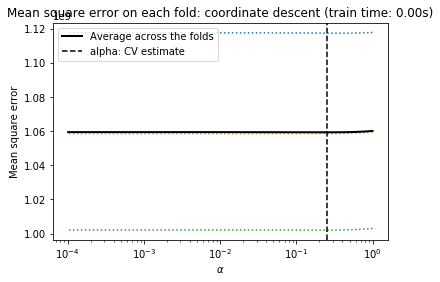

In [121]:
# Graficamos los resultados
import time
EPSILON = 1e-4
t1 = time.time()
t_lasso_cv = time.time() - t1

plt.figure()
# ymin, ymax = 2300, 3800
plt.semilogx(lassocv.alphas_ + EPSILON, lassocv.mse_path_, ':')
plt.plot(lassocv.alphas_ + EPSILON, lassocv.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(lassocv.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
# plt.ylim(ymin, ymax)

## Generamos la regresion lineal con Ridge Regression

In [122]:
Ridgecv = linear_model.RidgeCV(alphas=np.linspace(0.00000001,1, 500), cv=3, normalize=True)

In [123]:
Ridgecv.fit(X_train, y_train)
y_pred_Ridgecv = Ridgecv.predict(X_test)
y_pred_Ridgecv

array([26770.55090805, 17350.259906  , 22945.70683935, ...,
       15247.43694688, 26722.16442677, 23977.37153213])

In [124]:
RMSE_Ridgecv = np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ridgecv))
RMSE_Ridgecv

34176.36679298793

In [125]:
Ridgecv_score_train = Ridgecv.score(X_train, y_train)
Ridgecv_score_train

0.10797091828877703

In [126]:
Ridgecv_score_test = Ridgecv.score(X_test, y_test)
Ridgecv_score_test

0.10988764871281265

In [127]:
Ridgecv_alpha_optimo = Ridgecv.alpha_
Ridgecv_alpha_optimo

0.010020049979959918

## Generamos la regresion lineal con Elastic Net

In [128]:
#Instanciamos el modelo
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=3)

In [129]:
#Buscamos los hiperparametros 
search.fit(X,y)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [130]:
search.best_score_

-1107423106.02053

In [131]:
elastic_net = linear_model.ElasticNet(alpha=0.00001, l1_ratio = 0.8, normalize=True)

In [132]:
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)
y_pred_elastic_net

array([27020.64165293, 17638.09319326, 23187.46810634, ...,
       16096.32208222, 26982.7019194 , 24315.809707  ])

In [133]:
elastic_net_score_train = elastic_net.score(X_train, y_train)
elastic_net_score_train

0.10733534151414692

In [134]:
elastic_net_score_test = elastic_net.score(X_test, y_test)
elastic_net_score_test

0.10836951640974414

In [135]:
print('lassocv_score_train:', lassocv_score_train, 'lassocv_score_test:', lassocv_score_test)

lassocv_score_train: 0.10783454573532503 lassocv_score_test: 0.1097589340581573


In [136]:
print('Ridgecv_score_train:', Ridgecv_score_train, 'Ridgecv_score_test:', Ridgecv_score_test)

Ridgecv_score_train: 0.10797091828877703 Ridgecv_score_test: 0.10988764871281265


In [137]:
print('Elastic_net_score_train:', elastic_net_score_train, 'Elastic_net_score_test:', elastic_net_score_test)

Elastic_net_score_train: 0.10733534151414692 Elastic_net_score_test: 0.10836951640974414


# Regresion con Ordinary Least Squares y Statsmodel

In [138]:
results = sm.OLS(y_train, sm.add_constant(X_train.astype(float))).fit()
results.summary()

/home/miriam/anaconda3/envs/dsdhblend/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/miriam/anaconda3/envs/dsdhblend/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/miriam/anaconda3/envs/dsdhblend/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/miriam/anaconda3/envs/dsdhblend/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     price_per_m2_nuevo   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     132.4
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:48:37   Log-Likelihood:            -6.4620e+05
No. Observations:               54722   AIC:                         1.293e+06
Df Residuals:                   54671   BIC:                         1.293e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    2.956e+04    646.386     45.725      0.000    2.83e+04    3.08e+04
surface_total_in_m2_nuevo                  -0.0154      0.009     -1.808      0.071      -0.032       0.001
rooms_completo                           -949.2474    141.548     -6.706      0.000   -1226.682    -671.813
PILETA                                   1534.2260    415.327      3.694      0.000     720.182    2348.270
PARRILLA                                -2381.0429    340.395     -6.995      0.000   -3048.220   -1713.866
PATIO_JARDIN                            -5597.3603    399.241    -14.020      0.000   -6379.877   -4814.844
floor_copia                               -49.1151     14.535     -3.379      0.001     -77.605     -20.625
state_name_Bs.As. G.B.A. Zona Oeste     -7646.7937    567.895    -13.465      0.000   -8759.872   -6533.715
state_name_Bs.As. G.B.A. Zona Sur       -6895.7123    482.065    -14.305      0.000   -7840.563   -5950.862
state_name_Buenos Aires Costa Atlántica -3862.5173    546.792     -7.064      0.000   -4934.235   -2790.800
state_name_Buenos Aires Interior        -1.268e+04   1100.783    -11.520      0.000   -1.48e+04   -1.05e+04
state_name_Capital Federal               1.701e+04    374.980     45.357      0.000    1.63e+04    1.77e+04
state_name_Catamarca                    -1.996e+04   1.63e+04     -1.227      0.220   -5.19e+04    1.19e+04
state_name_Chaco                        -4511.0184   1.09e+04     -0.416      0.678   -2.58e+04    1.68e+04
state_name_Chubut                       -3414.6779   5590.096     -0.611      0.541   -1.44e+04    7541.952
state_name_Corrientes                   -6096.9725   1941.824     -3.140      0.002   -9902.961   -2290.984
state_name_Córdoba                      -1.301e+04    702.264    -18.526      0.000   -1.44e+04   -1.16e+04
state_name_Entre Ríos                   -1.421e+04   5588.957     -2.543      0.011   -2.52e+04   -3259.184
state_name_Jujuy                         -1.67e+04   1.63e+04     -1.026      0.305   -4.86e+04    1.52e+04
state_name_La Pampa                     -1.937e+04   1.63e+04     -1.190      0.234   -5.13e+04    1.25e+04
state_name_La Rioja                       1.93e-11   7.29e-11      0.265      0.791   -1.23e-10    1.62e-10
state_name_Mendoza                        -58.4197   2336.034     -0.025      0.980   -4637.063    4520.224
state_name_Misiones                     -8205.7823   4398.578     -1.866      0.062   -1.68e+04     415.462
state_name_Neuquén                      -4229.6943   3563.468     -1.187      0.235   -1.12e+04    2754.729
state_name_Río Negro                    -6553.0661   3023.012     -2.168      0.030   -1.25e+04    -627.941
state_name_Salta                        -1.146e+04   8703.1

In [139]:
results = sm.OLS(y_test, sm.add_constant(X_test.astype(float))).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     price_per_m2_nuevo   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     57.21
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:48:38   Log-Likelihood:            -2.1626e+05
No. Observations:               18241   AIC:                         4.326e+05
Df Residuals:                   18199   BIC:                         4.329e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    3.011e+04   1181.922     25.474      0.000    2.78e+04    3.24e+04
surface_total_in_m2_nuevo                  -2.4145      0.326     -7.411      0.000      -3.053      -1.776
rooms_completo                          -1031.9851    250.492     -4.120      0.000   -1522.972    -540.998
PILETA                                   3065.9761    752.876      4.072      0.000    1590.268    4541.684
PARRILLA                                -2257.1860    620.706     -3.636      0.000   -3473.827   -1040.545
PATIO_JARDIN                            -6261.0759    718.997     -8.708      0.000   -7670.378   -4851.773
floor_copia                               -74.0339     41.817     -1.770      0.077    -156.000       7.932
state_name_Bs.As. G.B.A. Zona Oeste     -7855.1266   1039.873     -7.554      0.000   -9893.376   -5816.877
state_name_Bs.As. G.B.A. Zona Sur       -7630.4575    874.779     -8.723      0.000   -9345.107   -5915.808
state_name_Buenos Aires Costa Atlántica -3741.5493    983.060     -3.806      0.000   -5668.439   -1814.659
state_name_Buenos Aires Interior        -1.218e+04   1996.030     -6.103      0.000   -1.61e+04   -8269.641
state_name_Capital Federal               1.826e+04    683.124     26.727      0.000    1.69e+04    1.96e+04
state_name_Catamarca                    -1.691e+04   1.71e+04     -0.990      0.322   -5.04e+04    1.66e+04
state_name_Chaco                        -1.399e+04   3.41e+04     -0.410      0.682   -8.09e+04    5.29e+04
state_name_Chubut                       -4409.9434   1.14e+04     -0.387      0.699   -2.67e+04    1.79e+04
state_name_Corrientes                   -4432.7911   3211.509     -1.380      0.168   -1.07e+04    1862.069
state_name_Córdoba                       -1.21e+04   1268.416     -9.538      0.000   -1.46e+04   -9611.586
state_name_Entre Ríos                   -7748.4691   8550.894     -0.906      0.365   -2.45e+04    9012.090
state_name_Jujuy                        -4.904e-11   7.41e-11     -0.662      0.508   -1.94e-10    9.62e-11
state_name_La Pampa                     -1.474e+04   2.41e+04     -0.610      0.542   -6.21e+04    3.26e+04
state_name_La Rioja                     -1.968e+04   3.41e+04     -0.576      0.564   -8.66e+04    4.72e+04
state_name_Mendoza                      -3249.5487   4513.598     -0.720      0.472   -1.21e+04    5597.529
state_name_Misiones                     -1.105e+04   6715.758     -1.645      0.100   -2.42e+04    2115.501
state_name_Neuquén                      -3395.1434   6591.771     -0.515      0.607   -1.63e+04    9525.349
state_name_Río Negro                     2555.6528   5117.780      0.499      0.618   -7475.679    1.26e+04
state_name_Salta                        -8132.3345   1.08e+

# Descenso de gradente

In [140]:
# Creamos la funcion de Descenso del gradiente.


def descenso_del_gradiente(X_train,y_train,num_steps = 100,learningRate = 0.10,criteria = 1e-5):
    """
    Toma como parametros la variable predicora X y la variable target.
    Se establece como parametros opcionales:
    num_steps: que define la cantidad máxima de saltos como un criterio de salida
    learning_rate: define la velocidad de aprendizaje
    criteria: define un segundo criterio de salida cuando el error es inferior a ese valor.
    """
    
    b_0 = 1
    b_1 = 1
    
    # en esta variable vamos a almacenar el MSE de la corrida anterior para luego calcular 
    # cuanto se redujo el error en un salto de gradiente.
    mse_previo = 0
    
    # Proceso iterativo como máximo realiza num_steps loops.
    for step in range(0, num_steps):
        
        #luego de inicializar los parametros calulamos el MSE actual para esos parametros
        mse_actual = metrics.mean_squared_error(y_train,  b_0 + b_1*X_train)
        
        # Plot
        plt.figure(figsize=(8,4))
        plt.scatter(X_train, y_train, alpha=0.5)
        plt.plot(X_train, b_0 + b_1*X_train)
        plt.title('step: ' + str(step+1))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.text(3, 6, "b0  = " + str(b_0))
        plt.text(3, 5, "b1  = " + str(b_1))
        plt.text(3, 4, "MSE = " + str(mse_actual))
        if step > 0:
            plt.text(3, 3, "reduccion del MSE = " + str(round(100*(mse_previo-mse_actual)/mse_previo,4))+"%")
        plt.show()
                  
        
                     
        b_0_gradient = 0
        b_1_gradient = 0
        N = len(X_train)
        
        for i in range(0, len(X_train)):
            b_0_gradient -= (2.0/N) * (y_train[i] - (b_0 + b_1 * X_train[i]))
            b_1_gradient -= (2.0/N) * (y_train[i] - (b_0 + b_1 * X_train[i])) * X_train[i]

        b_0 = b_0 - (learningRate * b_0_gradient)
        b_1 = b_1 - (learningRate * b_1_gradient)
        
        # almaceno el valor de MSE para comparar en el próximo salto
        mse_previo = mse_actual
                
        #verifico criterio de parada 
        if max(abs(learningRate * b_0_gradient), abs(learningRate * b_1_gradient)) < criteria:
            break
    
    
    return

In [142]:
#descenso_del_gradiente(X_train,y_train)

### Probando con variables

In [184]:
q = data_dummies["surface_total_in_m2_nuevo"].quantile(0.99)
data_dummies_2 = data_dummies[data_dummies["surface_total_in_m2_nuevo"] < q]

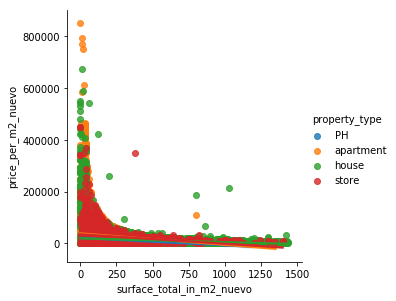

In [284]:
sns.pairplot(data_dummies_2, x_vars= 'surface_total_in_m2_nuevo', y_vars='price_per_m2_nuevo', kind='reg',\
                                                height=4, aspect=1, hue = 'property_type');

In [232]:
feature_cols = ['surface_total_in_m2_nuevo']
X = data_dummies_2[feature_cols]
y = data_dummies_2.price_per_m2_nuevo

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
lm = linear_model.LinearRegression()
model_1 = lm.fit(X_train, y_train)
print('Score model_1:', model_1.score(X_test, y_test))

Score model_1: 0.04500877769391998


In [336]:
lm_ridge = linear_model.RidgeCV(alphas=[0.1, 1, 10], normalize=True) 
model_1a = lm_ridge.fit(X_train, y_train)
print('Score model_1a:', model_1a.score(X_test, y_test))

Score model_1a: 0.10959458757238638


In [343]:
lm_lasso = linear_model.LassoCV(alphas=[0.1, 1, 10], normalize=True) 
model_1b = lm_lasso.fit(X_train, y_train)
print('Score model_1b:', model_1a.score(X_test, y_test))

Score model_1b: 0.10959458757238638


### Sumando future "state_name_Capital Federal"

In [268]:
feature_cols_cap = ['surface_total_in_m2_nuevo', 'state_name_Capital Federal']
X_cap = data_dummies_2[feature_cols]
y_cap = data_dummies_2.price_per_m2_nuevo

In [337]:
X_cap_train, X_cap_test, y_cap_train, y_cap_test = train_test_split(X_cap, y, test_size=0.35, random_state=10)
model_2 = lm.fit(X_cap_train, y_cap_train)
print('Score model_2:', model_2.score(X_cap_test, y_cap_test))

Score model_3: 0.06308520647771387


In [345]:
lm_ridge2 = linear_model.RidgeCV(alphas=[0.1, 1, 10], normalize=True) 
model_2a = lm_ridge2.fit(X_cap_train, y_cap_train)
print('Score model_2a:', model_2a.score(X_cap_test, y_cap_test))

Score model_2a: 0.06310394217161852


In [347]:
lm_lasso2 = linear_model.LassoCV(alphas=[0.1, 1, 10], normalize=True) 
model_2b = lm_lasso2.fit(X_cap_train, y_cap_train)
print('Score model_2b:', model_2b.score(X_cap_test, y_cap_test))

Score model_2b: 0.06312453687602759


### Sumando future "amenities"

In [320]:
feature_cols2 = ['surface_total_in_m2_nuevo', 'state_name_Capital Federal','rooms_completo','PILETA', 'PARRILLA','PATIO_JARDIN']
X_am = data_dummies_2[feature_cols2]
y_am = data_dummies_2.price_per_m2_nuevo

In [339]:
X_am_train, X_am_test, y_am_train, y_am_test = train_test_split(X_am, y_am, test_size = 0.25,random_state = 1)
model_3 = lm.fit(X_am_train, y_am_train)
print('Score model_3:', model_3.score(X_am_test, y_am_test))

Score model_3: 0.11641042731192075


In [341]:
lm_ridge3 = linear_model.RidgeCV(alphas=[0.1, 1, 10], normalize=True) 
model_3a = lm_ridge3.fit(X_am_train, y_am_train)
print('Score model_3a:', model_3a.score(X_am_test, y_am_test))

Score model_3a: 0.11557097105436308


In [350]:
lm_lasso3 = linear_model.LassoCV(alphas=[0.1, 1, 10], normalize=True) 
model_3b = lm_lasso3.fit(X_am_train, y_am_train)
print('Score model_3b:', model_3b.score(X_am_test, y_am_test))

Score model_3b: 0.11641668287715001


### Ridge

In [342]:
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                        normalize=True, cv=3) 

model_4 = lm_ridge.fit(X_am_train, y_am_train)

print('Score model_4:', model_4.score(X_am_test, y_am_test))

Score model_4: 0.11640935798991138


### Laso

In [323]:
lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25],\
                                        normalize=True, cv=3)

model_5 = lm_lasso.fit(X_am_train, y_am_train)

print('Score model_5:', model_5.score(X_am_test, y_am_test))

Score model_5: 0.11641668287715001


### OLS

In [329]:
results = sm.OLS(y_am_train, sm.add_constant(X_am_train.astype(float))).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                   OLS                    Adj. R-squared:         0.117       
Dependent Variable:      price_per_m2_nuevo     AIC:                    1280093.0979
Date:                    2020-06-24 15:17       BIC:                    1280155.3976
No. Observations:        54174                  Log-Likelihood:         -6.4004e+05 
Df Model:                6                      F-statistic:            1196.       
Df Residuals:            54167                  Prob (F-statistic):     0.00        
R-squared:               0.117                  Scale:                  1.0704e+09  
------------------------------------------------------------------------------------
                             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
------------------------------------------------------------------------------------
const                      26918.0011 293.0455  91.8561 0.0000 26343.6297 27492.3725
surface_total_in_m2_nuevo    -28.6985   0.7850 -36.5566 0.0000   -30.2371   -27.1598
state_name_Capital Federal 19356.5373 308.7987  62.6834 0.0000 18751.2895 19961.7851
rooms_completo             -1016.3868 142.7193  -7.1216 0.0000 -1296.1178  -736.6557
PILETA                      5057.3337 418.5407  12.0833 0.0000  4236.9908  5877.6767
PARRILLA                      -8.7711 339.1960  -0.0259 0.9794  -673.5978   656.0556
PATIO_JARDIN               -6057.1183 401.0151 -15.1045 0.0000 -6843.1111 -5271.1255
------------------------------------------------------------------------------------
Omnibus:                  67859.608          Durbin-Watson:             2.006       
Prob(Omnibus):            0.000              Jarque-Bera (JB):          14384270.550
Skew:                     6.808              Prob(JB):                  0.000       
Kurtosis:                 81.658             Condition No.:             747         
====================================================================================

"""